<p style="font-size: 14;color:green;font-size:30PX;font-family: arial;" align ="center" dir="rtl">
<b>
بررسی پارامترهای مختلف تولید در کارخانه تولید اکسیژن مجتع صنعتی چادرملو
</b>
</p>

<p style="font-size: 14;color:white;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1- آماده سازی داده ها
</b>
</p>

<p style="font-size: 14;color:white;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
1-1) فراخوان توابع و کتابخانه های مورد نیاز
</b>
</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
import os

#working_dir = os.getcwd()
working_dir ='..'  # Use on Jupyter Notebook

<p style="font-size: 14;color:white;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
2-1) ورود داده ها با فرمت دیتافریم
</b>
</p>

<p style="font-size: 14;color:white;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
توسط کتابخانه Pandas اطلاعات را بصورت دیتافریم وارد کرده و سپس ستون time را حذف می نماییم
</i>
</p>

In [3]:
df = pd.read_csv(f"{working_dir}/data/Oxygen_Plant_24Days.csv")
df.drop(labels='time',axis=1,inplace=True)
print(df.shape)

(7198, 62)


<p style="font-size: 14;color:white;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
3-1) نرمال سازی داده ها با استفاده از تابع MinMax
</b>
</p>

In [4]:
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
print(normal_df.head())

(7198, 62)
   AI1 Product gaseous (liquid) oxygen purity  \
0                                    0.949177   
1                                    0.963214   
2                                    0.971926   
3                                    0.974831   
4                                    0.977251   

   AI4 Oxygen content in waste nitrogen  \
0                              0.825601   
1                              0.847862   
2                              0.870124   
3                              0.873843   
4                              0.860840   

   Analys Argon (AI7) Product argon purity (O2 content)  \
0                                           0.287905      
1                                           0.287616      
2                                           0.287037      
3                                           0.287037      
4                                           0.287037      

   AI12 Carbon dioxide in plant air content (AI12)  \
0                         

<p style="font-size: 14;color:white;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
4-1) محاسبه ضریب همبستگی بین متغیرها
</b>
</p>

<p style="font-size: 14;color:white;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
از تابع corr در کتابخانه Pandas برای بدست آوردن ضرایب همبستگی استفاده می کنیم و سپس آن را نمایش می دهیم
</i>
</p>

In [5]:
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

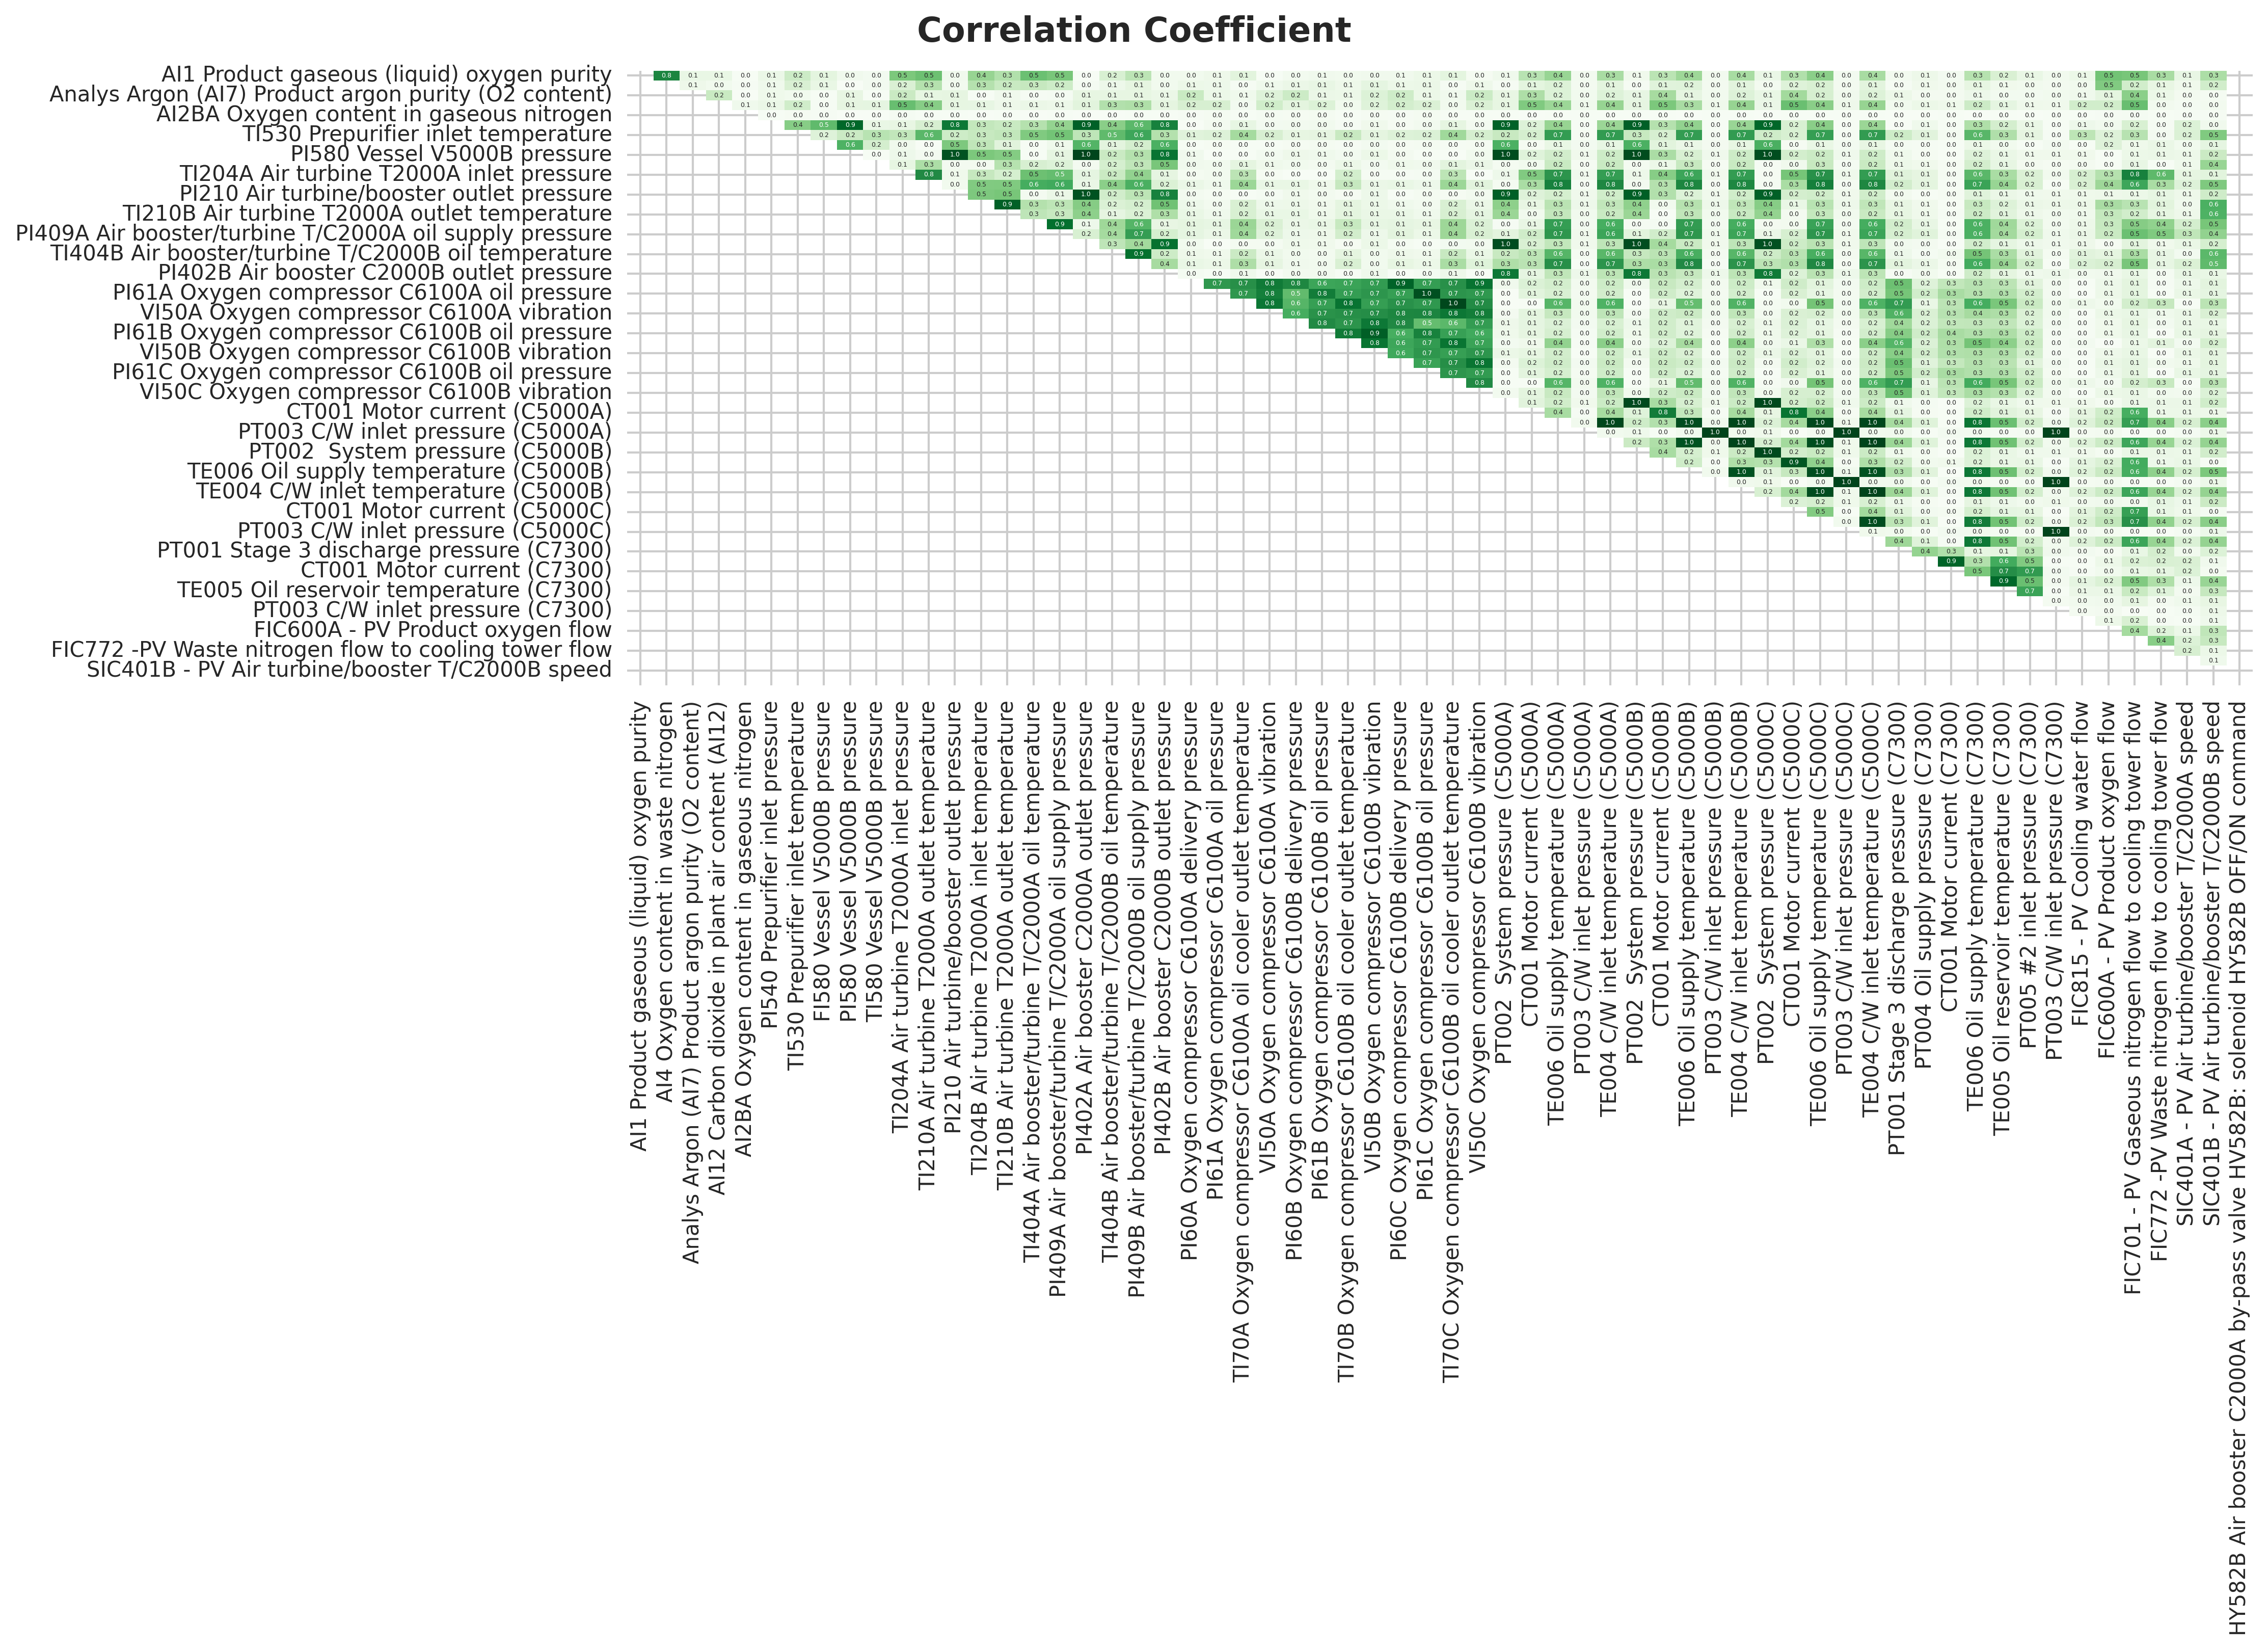

In [6]:
fig = plt.figure(figsize=(15,11),dpi=300)
fig.suptitle('Correlation Coefficient', fontsize=16,fontweight='bold')
ax1 = fig.subplots(1,1)
sns.heatmap(
    data=corr_df,
    cbar=False,
    square= False,
    fmt='.1f',
    annot=True,
    annot_kws={'size':3},
    cmap='Greens',
    ax= ax1
    )
fig.tight_layout()
#plt.savefig(f'{working_dir}/temp/Correlation_Coefficient.jpg')
plt.show()

<p style="font-size: 14;color:white;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
کلیه متغیرهایی که باهم همبستگی بیشتر از 0.95 دارند را مشخص می کنیم تا نسبت به حذف آنها تصمیم گیری نماییم 
</i>
</p>

In [7]:
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name.head())

                              0                                          1
0  PI580 Vessel V5000B pressure  PI210 Air turbine/booster outlet pressure
1  PI580 Vessel V5000B pressure  PI402A Air booster C2000A outlet pressure
2  PI580 Vessel V5000B pressure            PT002  System pressure (C5000A)
3  PI580 Vessel V5000B pressure            PT002  System pressure (C5000B)
4  PI580 Vessel V5000B pressure            PT002  System pressure (C5000C)


<p style="font-size: 14;color:white;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
متغیرهایی که به دلیل همبستگی بالا حذف می شوند عبارتند از:
</i>
</p>

In [8]:
high_corr_to_drop = pd.read_csv(f"{working_dir}/data/high_corr_features.csv")
print(high_corr_to_drop)

                                   high_corr_features
0                     PT002  System pressure (C5000B)
1                     PT002  System pressure (C5000C)
2         PI61C Oxygen compressor C6100B oil pressure
3   TI70C Oxygen compressor C6100B oil cooler outl...
4               TE006 Oil supply temperature (C5000B)
5                TE004 C/W inlet temperature (C5000B)
6               TE006 Oil supply temperature (C5000C)
7                TE004 C/W inlet temperature (C5000C)
8                   PT003 C/W inlet pressure (C5000B)
9                   PT003 C/W inlet pressure (C5000C)
10                   PT003 C/W inlet pressure (C7300)


In [9]:
df.drop(labels=high_corr_to_drop['high_corr_features'] ,axis=1,inplace=True)
print(df.shape)

(7198, 51)


<p style="font-size: 14;color:white;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
2- مشخص کردن آنورمالی در داده ها (Clustering)
</b>
</p>

<p style="font-size: 14;color:white;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
1-2) کاهش متغیرها با استفاده از الگوریتم PCA
</b>
</p>

In [10]:
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)

pca = PCA(random_state=0)
pca.fit_transform(normal_df)
#print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_)*100)


(7198, 51)
[ 29.67461846  51.48592844  61.24123284  68.51033493  72.27418148
  75.79380214  78.89319132  81.17706528  83.23891551  85.20097126
  86.97480058  88.61999067  89.95163597  91.16798578  92.11920027
  92.93414513  93.70717901  94.36480577  94.95693923  95.49774873
  96.00835004  96.45060034  96.86682446  97.19255929  97.49278603
  97.7567926   98.01167621  98.22624802  98.43918367  98.63457594
  98.819377    98.98812379  99.13912413  99.27370309  99.40126514
  99.50468442  99.58930318  99.66102873  99.72788528  99.78629535
  99.83055846  99.87304997  99.91116894  99.94277378  99.96475069
  99.97647843  99.98774461  99.99235137  99.99646094 100.
 100.        ]


<p style="font-size: 14;color:white;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
با توجه به نتایج حاصله برای حفظ 75 درصد خواص داده ها می توانیم متغیرها را به حداقل شش عدد کاهش دهیم
</i>
</p>

In [11]:
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)

pca = PCA(n_components=6,random_state=0)
data=pca.fit_transform(normal_df)
pca_column_name = [f"PCA{column}"  for column in range(pca.n_components_) ]
pca_df = pd.DataFrame(data=data,columns=pca_column_name)
print(np.cumsum(pca.explained_variance_ratio_)*100)
print(pca_df.shape)

(7198, 51)
[29.67461846 51.48592844 61.24123284 68.51033493 72.27418148 75.79380214]
(7198, 6)


<p style="font-size: 14;color:white;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
2-2) خوشه بندی داده های کاهش یافته با الگوریتم Agglomerative
</b>
</p>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

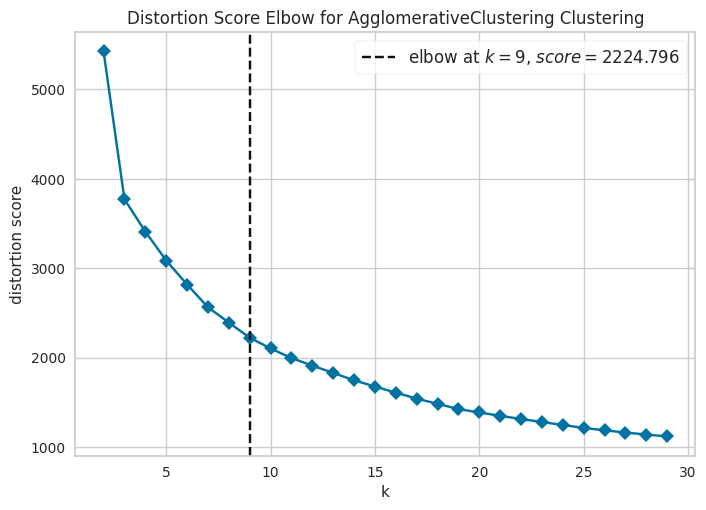

<Figure size 800x550 with 0 Axes>

In [12]:
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(pca_df)
# Finalize and render figure
visualizer.show()
visualizer.fig.clf()

<p style="font-size: 14;color:white;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
با توجه به آنالیز فوق مناسب ترین تعداد Cluster نه عدد می باشد بنابراین خوشه بندی را با 9 عدد انجام می دهیم
</i>
</p>

In [13]:
model = AgglomerativeClustering(n_clusters = 9, metric= 'euclidean', linkage ='average')
model.fit(pca_df)
print(np.unique(model.labels_))
print(model.labels_.shape)

[0 1 2 3 4 5 6 7 8]
(7198,)


<p style="font-size: 14;color:white;font-size:18PX;font-family: arial;" align ="justify" dir="rtl">
<i>
اکنون لیبل های بدست آمده را به دیتابیس اصلی اضافه و برای استفاده های بعدی دیتابیس را سیو می کنیم
</i>
</p>

In [14]:
df["labels"] = model.labels_
print(df.shape)
df.to_csv(f"{working_dir}/data/final_oxy_with_labels.csv",index=False)

(7198, 52)


<p style="font-size: 14;color:white;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
3- بررسی داده ها با توجه به خوشه بندی انجام شده
</b>
</p>

<p style="font-size: 14;color:white;font-size:20PX;font-family: arial;" align ="justify" dir="rtl">
<b>
1-3) جلوص اکسیژن مایع تولیدی در چه کلاس هایی بوده است
</b>
</p>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

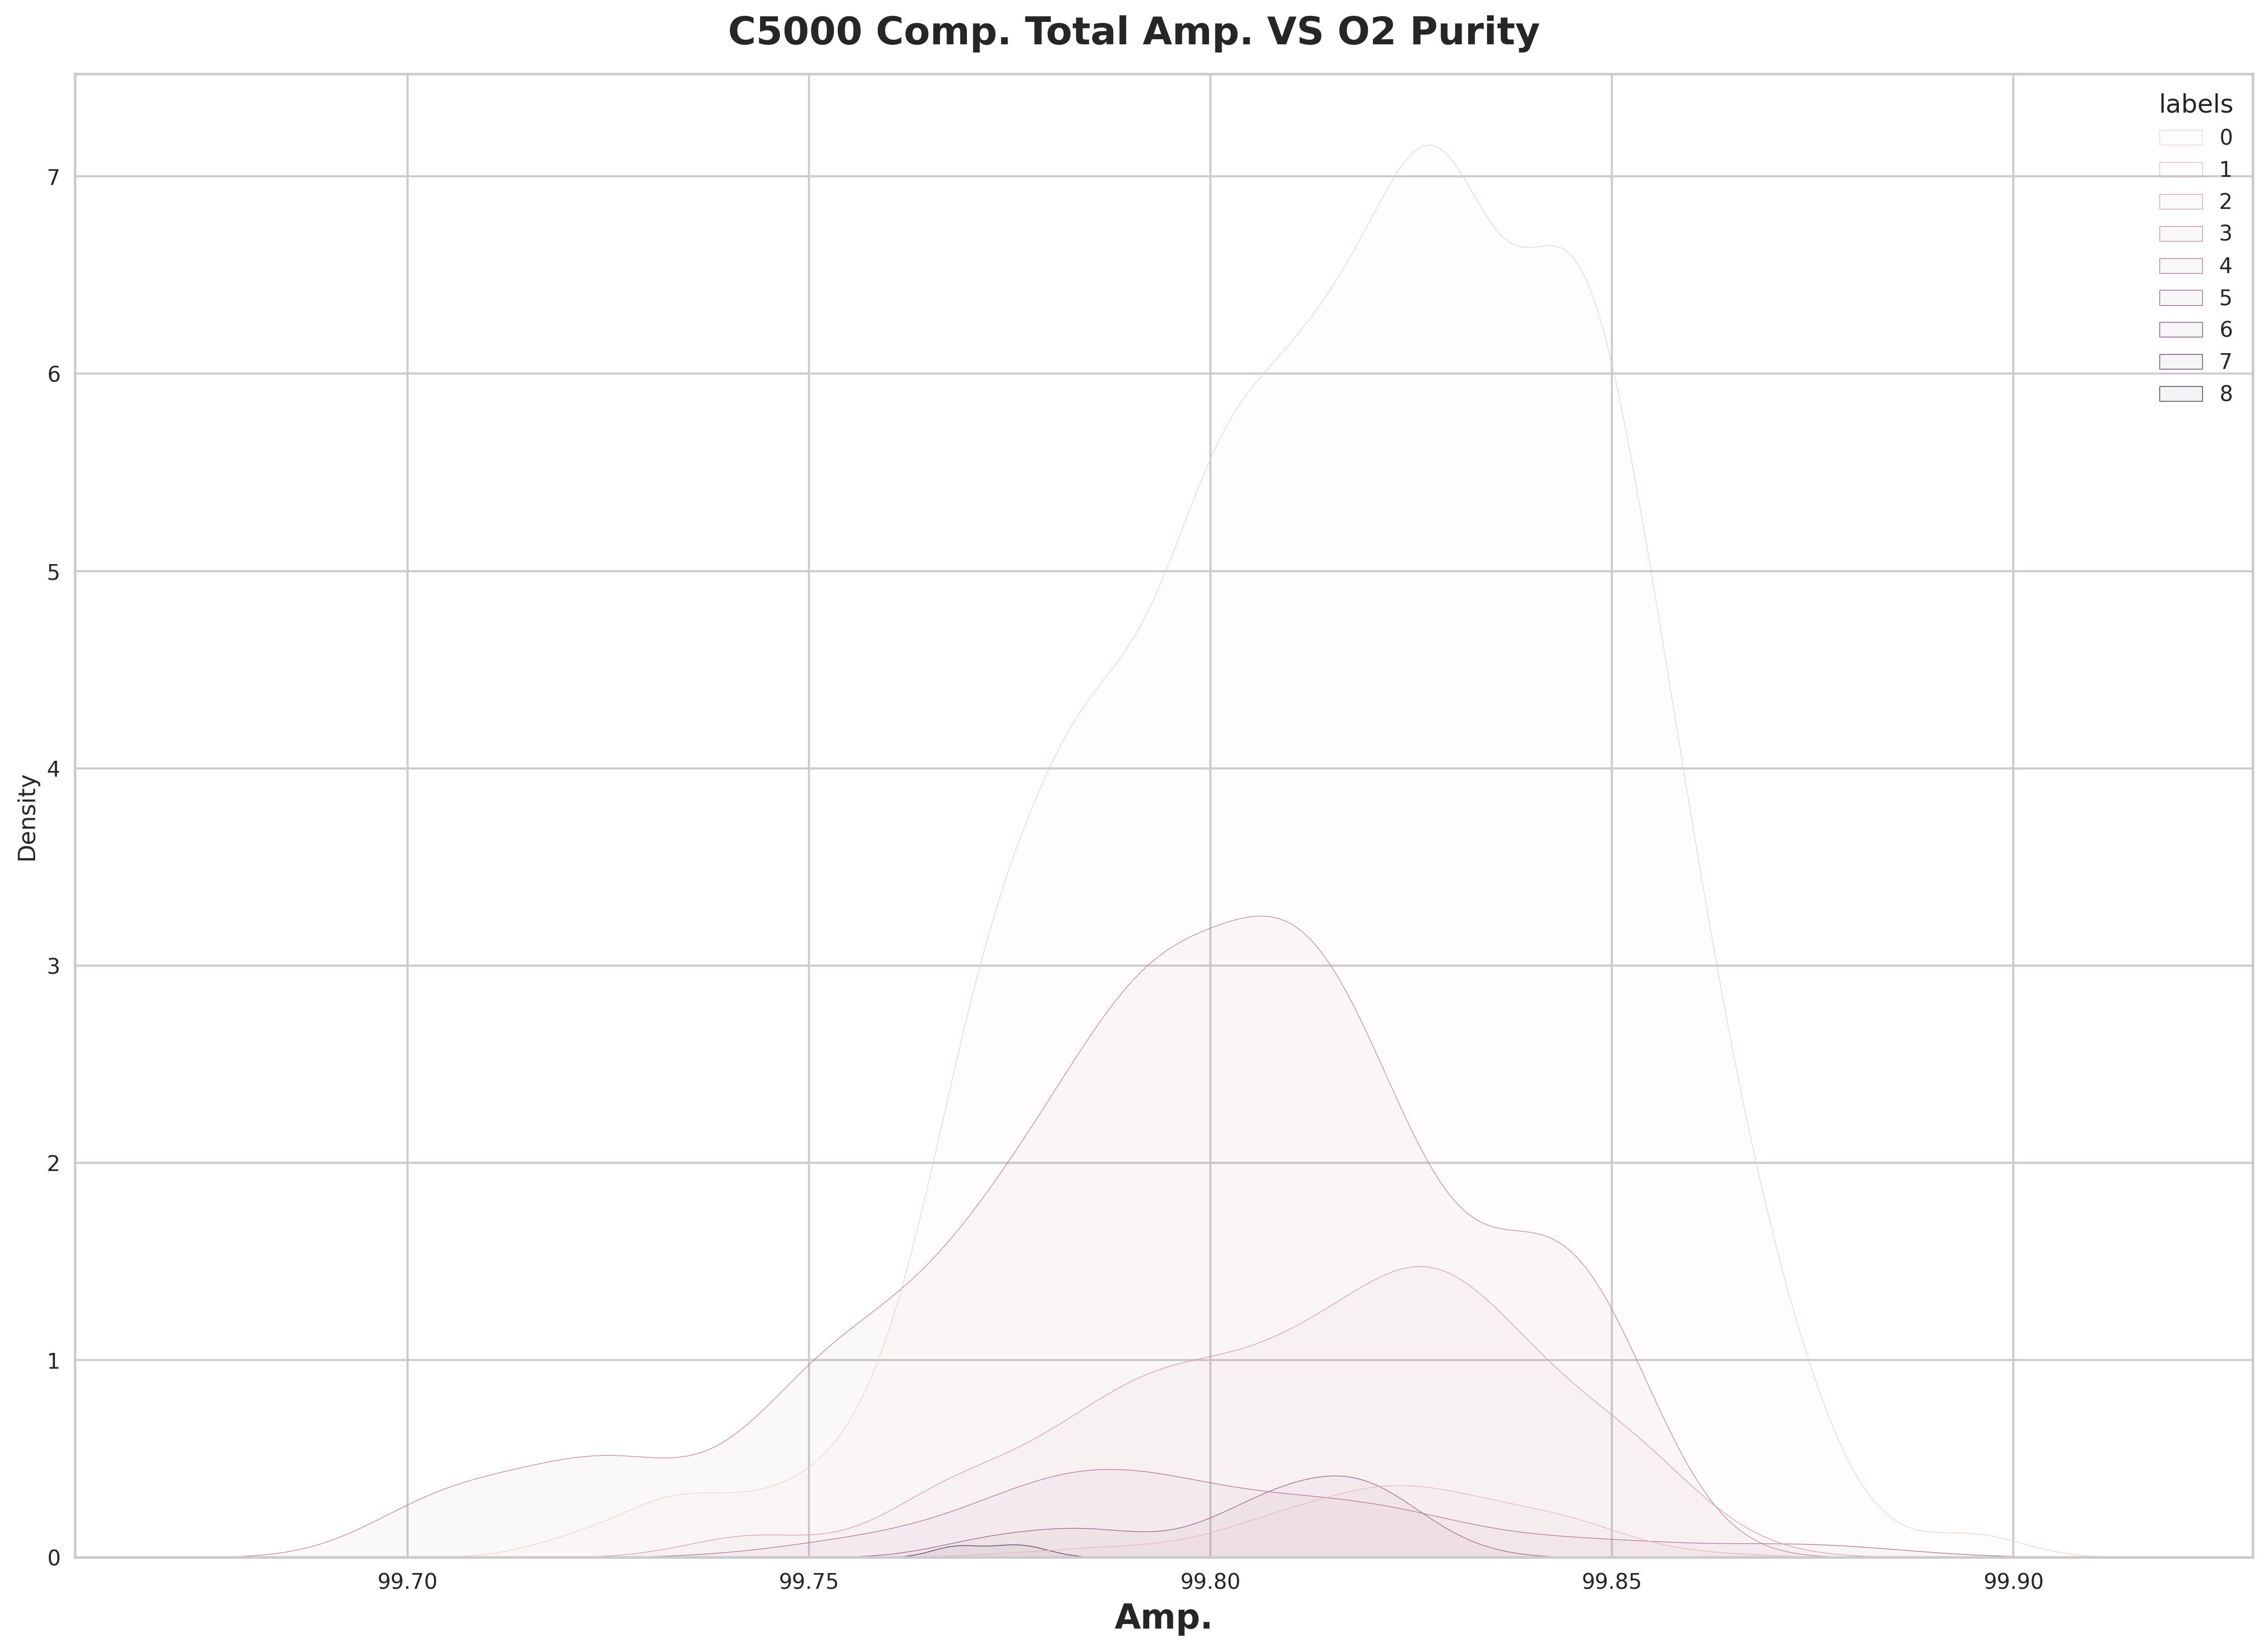

In [15]:
fig = plt.figure(figsize=(15,11),dpi=300)
fig.suptitle('C5000 Comp. Total Amp. VS O2 Purity', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Amp.', fontsize=16,fontweight='bold')
sns.kdeplot(
    data=df,
    x='AI1 Product gaseous (liquid) oxygen purity',
    hue="labels",
    fill=True,
    alpha = 0.05,
    warn_singular=False,
)
#plt.axvline(290, c='green')
#plt.annotate('290 Amp.', xy =(289.5, 0.05),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
#plt.axvline(292.5, c='green')
#plt.annotate('292.5 Amp.', xy =(292, 0.05),rotation = 90,ha='center', fontsize=20,alpha = 0.8)
fig.tight_layout()
#plt.savefig(f'{working_dir}/fig/C5000 Amp VS O2 purity.jpg')
plt.show()
